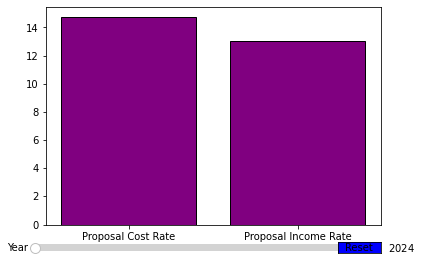

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots()

proposal_cost_rate = [14.71, 15.00, 15.19, 15.35, 15.40, 15.45, 15.50, 15.54, 15.57, 15.71,
                      15.81, 15.90, 15.98, 16.05, 16.11, 16.16, 16.21, 16.24, 16.27, 16.28,
                      16.29, 16.30, 16.31, 16.32, 16.34, 16.36, 16.38, 16.42, 16.45, 16.50,
                      16.55, 16.61, 16.67, 16.74, 16.81, 16.88, 16.95, 17.01, 17.06, 17.12,
                      17.17, 17.23, 17.28, 17.34, 17.39, 17.46, 17.51, 17.57, 17.62, 17.68,
                      17.73, 17.77, 17.80, 17.82, 17.83, 17.83, 17.82, 17.81, 17.79, 17.76,
                      17.72, 17.67, 17.62, 17.56, 17.51, 17.45, 17.40, 17.37, 17.34, 17.33,
                      17.32, 17.33, 17.35, 17.37, 17.40]

proposal_income_rate  = [
13.03, 12.89, 13.07, 13.11, 13.13, 13.16, 13.18, 13.20, 13.22, 13.26,
    13.27, 13.28, 13.29, 13.30, 13.31, 13.31, 13.32, 13.32, 13.33, 13.33,
    13.33, 13.33, 13.34, 13.34, 13.34, 13.34, 13.35, 13.35, 13.35, 13.36,
    13.36, 13.36, 13.37, 13.38, 13.38, 13.39, 13.39, 13.40, 13.40, 13.41,
    13.41, 13.42, 13.42, 13.43, 13.43, 13.44, 13.44, 13.44, 13.45, 13.45,
    13.46, 13.46, 13.47, 13.47, 13.47, 13.47, 13.47, 13.47, 13.47, 13.47,
    13.47, 13.47, 13.46, 13.46, 13.46, 13.45, 13.45, 13.45, 13.44, 13.44,
    13.44, 13.44, 13.44, 13.44, 13.45, 13.45
]

axyear = plt.axes([0.1, 0.02, 0.8, 0.05])
year_slider = Slider(axyear, 'Year', 2024, 2099, valinit=2024, valstep=1)

x_axis = ["Proposal Cost Rate", "Proposal Income Rate"]
y_axis = [proposal_cost_rate[0], proposal_income_rate[0]]

bars = ax.bar(x_axis, y_axis, color='purple', edgecolor="black")

def update(val):
    year = int(year_slider.val)
    index = year - 2024  
    new_y_axis = [proposal_cost_rate[index], proposal_income_rate[index]]
    
    for bar, new_height in zip(bars, new_y_axis):
        bar.set_height(new_height)
    
    fig.canvas.draw_idle() 

year_slider.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color='blue', hovercolor='skyblue')

def reset_slider(event):
    year_slider.reset()

button.on_clicked(reset_slider)

plt.show()
